In [15]:
import time
import numpy as np
import itertools
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict, Callable, Iterable, Union
from sklearn.linear_model import LinearRegression

In [30]:
def split(t: List) -> tuple[List, int, List]:
    """ Función que devuelve una tupla con las listas de elementos menores y mayores que el pivote, además del pivote
    Args:
        t (List): lista con la tabla original
    Returns: 
        tuple[List, int, List]: lista de menores, el pivote, lista de mayores
    """
    mid = t[0]
    t_l = [u for u in t if u < mid]
    t_r = [u for u in t if u > mid]
    return (t_l, mid, t_r)

In [17]:
def qsel(t: np.ndarray, k: int)-> Union[int, None]:
    if k >= len(t) or k < 0:
        return
    if len(t) == 1 and k == 0:
        return t[0]

    t_l, mid, t_r = split(t)
    m = len(t_l)
    if k == m:
        return mid
    elif k < m:
        return qsel(t_l, k)
    else:
        return qsel(t_r, k-m-1)

In [18]:
def qsel_nr(t: np.ndarray, k: int)-> Union[int, None]:
    tt = t.copy()
    while len(tt) > 0:
        if len(tt) == 1 and k == 0:
            return tt[0]
        t_l, mid, t_r = split(tt)
        m = len(t_l)
        if k == m:
            return mid
        elif k < m:
            tt = t_l
        else:
            tt = t_r
            k = k-m-1
    return

In [19]:
t = list(range(11))[ : : -1]
t = np.random.permutation(11)
shift = 0
for k in range(len(t)):
    print(k, qsel(t, k+shift))
    print(k, qsel_nr(t, k+shift)) 

0 0
0 0
1 1
1 1
2 2
2 2
3 3
3 3
4 4
4 4
5 5
5 5
6 6
6 6
7 7
7 7
8 8
8 8
9 9
9 9
10 10
10 10


In [20]:
def split_pivot(t: np.ndarray, mid: int)-> Tuple[np.ndarray, int, np.ndarray]:
    s1 = [i for i in t if i < mid]
    s2 = [i for i in t if i > mid]
    return (s1, mid, s2)

In [21]:
t = list(range(11))[ : : -1]
t = np.random.permutation(11)
sp=split_pivot(t, 7)
print(t)
sp

[ 0  2  9  3 10  6  8  4  7  5  1]


([0, 2, 3, 6, 4, 5, 1], 7, [9, 10, 8])

In [22]:
def pivot5(t: np.ndarray)-> int:
    if len(t) > 5:
        group_size = 5
        n_group = len(t) // group_size
        index_median = group_size // 2 
        
        sublists =  [t[j:j+ group_size] for j in range(0, len(t), group_size)][:n_group]
        
        medians = [sorted(sub)[index_median] for sub in sublists]
        
        if len(medians)%2 == 0:
            pivot = sorted(medians)[len(medians)//2-1]
        else:
            pivot = sorted(medians)[len(medians)//2]
            
        return pivot
    else:
        return np.sort(t)[len(t)//2]

In [23]:
def qsel5_nr(t: np.ndarray, k: int)-> Union[int, None]:
    if k >= len(t) or k < 0:
        return
    
    tt = t.copy()
    while len(tt) > 5:

        mid = pivot5(np.array(tt))

        t_l, mid, t_r = split_pivot(tt, mid)
        m = len(t_l)

        if k == m:
            return mid
        elif k < m:
            tt = t_l
        else:
            tt = t_r
            k = k-m-1
    if len(tt) <= 5:
        return int(np.sort(tt)[k])

In [24]:
t = list(range(11))[ : : -1]
t = np.random.permutation(11)
shift = 0
for k in range(len(t)):
    print(k, qsel5_nr(t, k+shift)) 

0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10


In [25]:
def qsort_5(t: np.ndarray)-> np.ndarray:
    
    if t is None:
        return None

    if len(t) == 0:
        return np.array([])
    
    x = t.copy()
    mid = pivot5(np.array(x))

    t_left, mid, t_right = split_pivot(x, mid)

    if len(t_left) > 1:
        t_left = qsort_5(t_left)
    if len(t_right) > 1:
        t_right = qsort_5(t_right)

    t_left = np.append(t_left, np.array([mid]))

    return np.append(t_left, t_right)

In [26]:
def fit_func_2_times(timings: np.ndarray, func_2_fit: Callable):
    if len(timings.shape) == 1:
        timings = timings.reshape(-1, 1)
    values = func_2_fit(timings[ :, 0]).reshape(-1, 1)

    times = timings[ : , 1] / timings[0, 1]

    lr_m = LinearRegression()
    lr_m.fit(values, times)
    return lr_m.predict(values)

def n_logn(n):
    return n*np.log(n)

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
[[5.00000000e+01 9.51234800e-04]
 [1.00000000e+02 1.23122740e-03]
 [1.50000000e+02 1.80460820e-03]
 [2.00000000e+02 2.43365240e-03]
 [2.50000000e+02 3.07950040e-03]
 [3.00000000e+02 3.72256860e-03]
 [3.50000000e+02 4.47133420e-03]
 [4.00000000e+02 5.16014860e-03]
 [4.50000000e+02 5.75337820e-03]
 [5.00000000e+02 6.49671020e-03]
 [5.50000000e+02 7.17094140e-03]
 [6.00000000e+02 8.10428300e-03]
 [6.50000000e+02 8.78995440e-03]
 [7.00000000e+02 9.50455380e-03]
 [7.50000000e+02 1.00078982e-02]
 [8.00000000e+02 1.07813876e-02]
 [8.50000000e+02 1.17882158e-02]
 [9.00000000e+02 1.23235194e-02]
 [9.50000000e+02 1.29930436e-02]
 [1.00000000e+03 1.35813844e-02]]


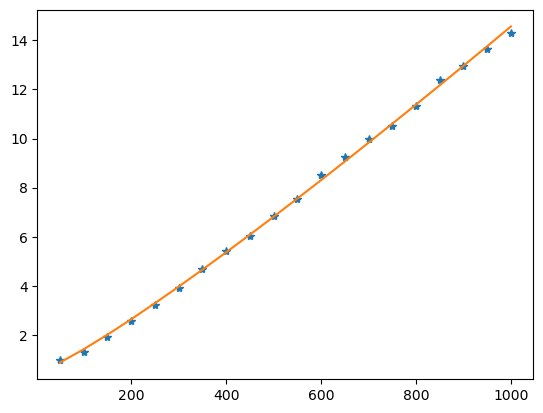

In [27]:
l_times_qs=[]

for i in range(50, 1001, 50):
    print (i)
    t=np.random.permutation(i).astype(int)
    timings= %timeit -n 5 -r 5 -o -q qsort_5(t)
    l_times_qs.append([len(t), timings.best])

a_timings=np.array(l_times_qs)
print(a_timings)

fitted_timings=fit_func_2_times(a_timings, n_logn)

_=plt.plot(a_timings[ : , 0], a_timings[ : , 1]/a_timings[0 , 1], '*', a_timings[ : , 0], fitted_timings, '-')




In [ ]:
def edit_distance(str_1: str, str_2: str)-> int:
	n_rows, n_columns = 1+len(str_1), 1+len(str_2)

	dist_matrix = np.zeros((n_rows, n_columns)).astype(int)
	dist_matrix[0] = np.arange(n_columns).astype(int)
	dist_matrix[ : , 0] = np.arange(n_rows).astype(int)

	for i in range(1, n_rows):
		for j in range(1, n_columns):
			if str_1[i-1] == str_2[j-1]:
				dist_matrix[i, j] = dist_matrix[i-1, j-1]
			else:
				dist_matrix[i, j] = 1 + min(dist_matrix[i-1, j-1], dist_matrix[i-1, j], dist_matrix[i, j-1])

	return dist_matrix[n_rows - 1][n_columns - 1]

In [ ]:
print(edit_distance("marcos", "raul"))

In [ ]:
def max_subsequence_length(str_1: str, str_2: str)-> int:
	e = np.zeros((len(str_1)+1, len(str_2)+1), dtype=int)
    
	for i in range(1, len(str_1)+1):
		for j in range(1, len(str_2)+1):
			if (str_1[i-1] == str_2[j-1]):
				e[i,j] = 1 + e[i-1, j-1]    
			else :
				e[i, j] = max(e[i-1, j], e[i, j-1])
	return e[len(str_1), len(str_2)]

In [ ]:
print(max_subsequence_length("marcos", "raul"))

In [ ]:
def max_common_subsequence(str_1: str, str_2: str)-> str:
	e = np.zeros((len(str_1)+1, len(str_2)+1), dtype=int)
	word = ""
	z = 0
    
	for i in range(1, len(str_1)+1):
		for j in range(1, len(str_2)+1):
			if (str_1[i-1] == str_2[j-1]):
				if e[i-1, j-1] == z:
					z += 1
					word += str_1[i-1]
				e[i,j] = 1 + e[i-1, j-1]    
			else :
				e[i, j] = max(e[i-1, j], e[i, j-1])
	return word

In [ ]:
print(max_common_subsequence("abcde", "ace"))